# Exploratory Data Analysis (EDA)

It is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data in hand, before getting them dirty with it.

## Haberman dataset

Haberman's Survival Data Set: https://www.kaggle.com/gilsousa/habermans-survival-data-set

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:

1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

**Objective: Predict the survival status based on 3 features**

## Environment Setup

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Load haberman's dataset into a pandas dataFrame.
haberman = pd.read_csv("haberman.csv")

sns.set()

In [40]:
print (haberman.shape)

(306, 4)


In [41]:
print (haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [42]:
print (haberman.head())  # First 5 records. It takes 5 as default.

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1


In [43]:
print (haberman.tail(10)) # Last 10 records.

     age  year  nodes  status
296   72    67      3       1
297   73    62      0       1
298   73    68      0       1
299   74    65      3       2
300   74    63      0       1
301   75    62      1       1
302   76    67      0       1
303   77    65      3       1
304   78    65      1       2
305   83    58      2       2


In [44]:
haberman["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

In [45]:
print (haberman.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


#### Observations:

- There are no missing values in this dataset.
- haberman is a imbalanced dataset.

In [46]:
print (haberman.describe())

              age        year       nodes      status
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


#### Observations:

- 75% of the positive lymph nodes are less than 5.

## Univariate Analysis

Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, "variate" means "variable or numeric variable". In other words your data has only one variable. It doesn't deal with causes or relationships and it's major purpose is to describe. It takes data, summarizes it and finds patterns in the it.

### PDF(Probability Density Function)

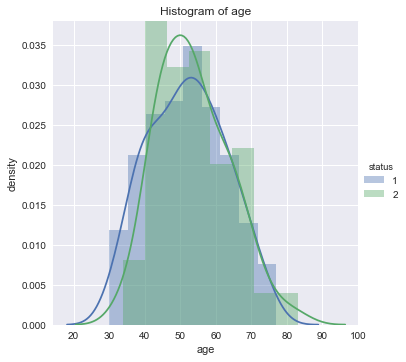

In [47]:
# Here, we are using age feature to generate pdf()
# pdf(smoothed form of histogram)
# pdf basically shows, how many of points lies in some interval

sns.FacetGrid(haberman, hue='status', size=5) \
   .map(sns.distplot, 'age') \
   .add_legend()
plt.title("Histogram of age")
plt.ylabel("density")
plt.show()

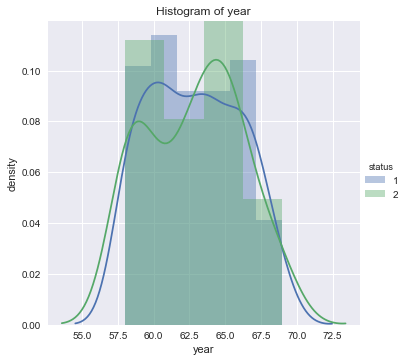

In [48]:
sns.FacetGrid(haberman, hue='status', size=5) \
   .map(sns.distplot, 'year') \
   .add_legend()
plt.title("Histogram of year")
plt.ylabel("density")
plt.show()

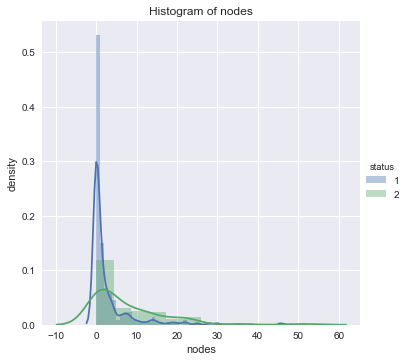

In [49]:
sns.FacetGrid(haberman, hue='status', size=5) \
   .map(sns.distplot, 'nodes') \
   .add_legend()
plt.title("Histogram of nodes")
plt.ylabel("density")
plt.show()

#### Observations:

- Most number of nodes lie between 0 to 5.

### CDF (Cumulative Distributed Function)

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


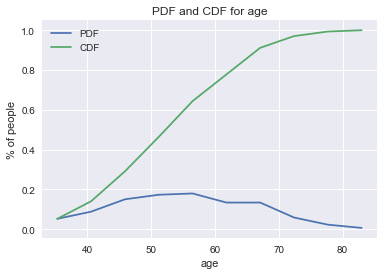

In [50]:
# cdf gives you cummulative probability associated with a function
# Cumulative sum of area under curve upto gives you cdf

counts, bin_edges = np.histogram(haberman['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('age')
plt.title("PDF and CDF for age")
plt.ylabel("% of people")
plt.legend(['PDF', 'CDF'])

plt.show();

[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


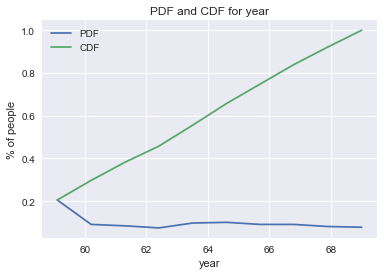

In [51]:
counts, bin_edges = np.histogram(haberman['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('year')
plt.title("PDF and CDF for year")
plt.ylabel("% of people")
plt.legend(['PDF', 'CDF'])

plt.show()

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


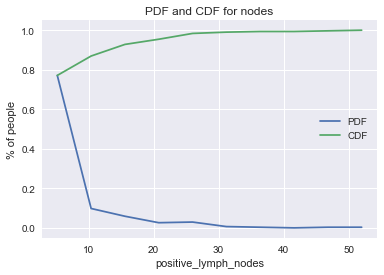

In [52]:
counts, bin_edges = np.histogram(haberman['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('positive_lymph_nodes')
plt.title("PDF and CDF for nodes")
plt.ylabel("% of people")
plt.legend(['PDF', 'CDF'])

plt.show()

#### Observations:

- 80% pateints have nodes below 5.
- 95% of pateints have less than 20 nodes.

### Box Plot

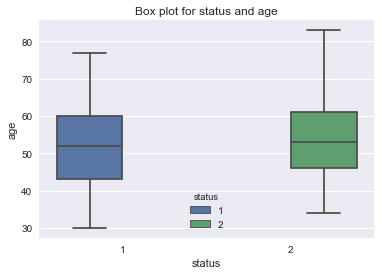

In [53]:
# Box plot gives you the statistical summery of data
# Rectangle represent the 2nd and 3rd quartile (horizontal line either side of the rectangle)
# The horizontal line inside box represents median

sns.boxplot(x='status',y='age', hue='status', data=haberman)
plt.title("Box plot for status and age")
plt.show()

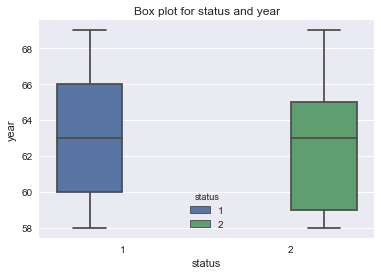

In [54]:
sns.boxplot(x='status',y='year', hue='status', data=haberman)
plt.title("Box plot for status and year")
plt.show()

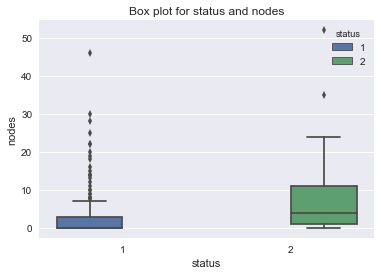

In [55]:
sns.boxplot(x='status',y='nodes', hue='status', data=haberman)
plt.title("Box plot for status and nodes")
plt.show()

### Violin Plot

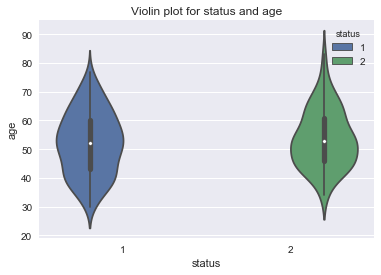

In [56]:
# The violin plot shows the full distribution of the data.
# It is combination of box plot and histogram
# central dot represents median

sns.violinplot(x="status", y="age", hue="status", data=haberman, size=8)
plt.title("Violin plot for status and age")
plt.show()

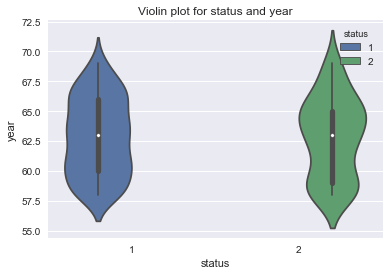

In [57]:
sns.violinplot(x="status", y="year", hue="status", data=haberman, size=8)
plt.title("Violin plot for status and year")
plt.show()

#### Observations:

- People with year of operation more than 60 (i.e 61-68) has sightly less chance of survival than people with less than 60 (i.e 55-60).

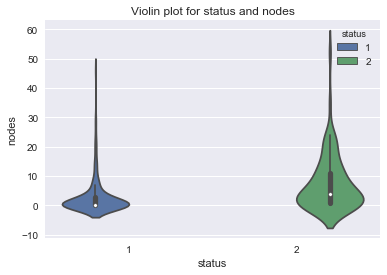

In [58]:
sns.violinplot(x="status", y="nodes", hue="status", data=haberman, size=8)
plt.title("Violin plot for status and nodes")
plt.show()

## Multivariate Analysis

### Pair Plot

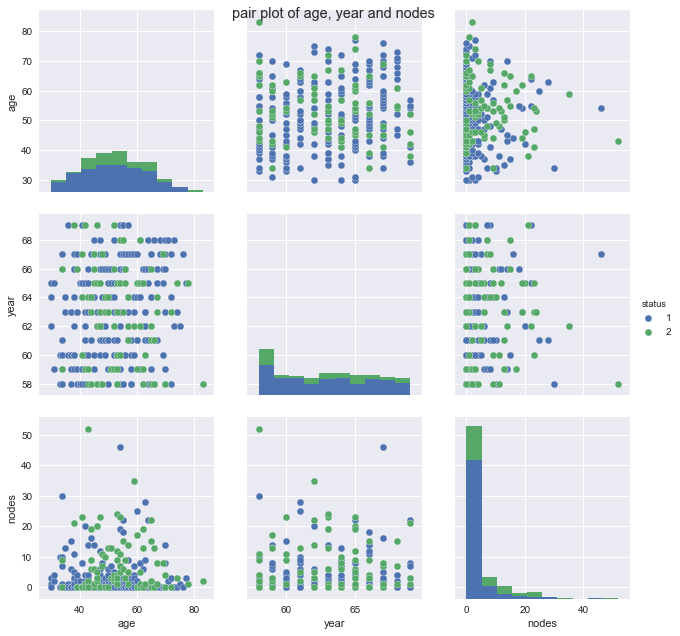

In [59]:
# Pair Plot are used to plot 2d scatter plot of all features with each other.
# It is plotted if there are less feature (4 in this case) in the dataset.

sns.pairplot(haberman, hue="status", vars=['age','year','nodes'], size=3);
plt.suptitle("pair plot of age, year and nodes")
plt.show()

## Conclusions: 

- 80% of positive lymph nodes lies between 0 to 5.
- There is no missing value in this dataset.
- Haberman dataset is an imbalanced dataset.
- People with year of operation more than 60 (i.e 61-68) has sightly less chance of survival than people with less than 60 (i.e 55-60).
- We cannot use simple if-else model for classification. We need more features to come to a very good conclusion.
